In [12]:
from importlib import reload
import utilities.data
reload(utilities.data)

import matplotlib.pyplot as plt
from utilities.data import load_data, make_arrivals, make_stations, make_trips, make_num_per_hour
from ipyleaflet import Map, CircleMarker, Popup, Marker
from ipywidgets import HTML
import pandas as pd
import panel as pn
import ipywidgets_bokeh
from ipywidgets_bokeh import IPyWidget
pn.extension()

Initialisere map med marker i sentrum på gitt koordinat

In [3]:
def initalize_map(lat, long):
    m = Map(center=[lat, long])
    marker = Marker(location=[lat, long])
    m.add_layer(marker)
    return m

In [4]:
layout = pn.interact(initalize_map, lat=60.7, long=5.7)
layout.pprint()

Column
    [0] Column
        [0] FloatSlider(end=182.10000000000002, name='lat', start=-60.7, value=60.7)
        [1] FloatSlider(end=17.1, name='long', start=-5.7, value=5.7)
    [1] Row
        [0] IPyLeaflet(Map, name='interactive00099')


In [5]:
slider_lat = pn.widgets.FloatSlider(value=60.7)
slider_long = pn.widgets.FloatSlider(value=5.7)
bound_fn = pn.bind(initalize_map, lat=slider_lat, long=slider_long)

liker ikke at jeg får pane med bound function i stedet for eksplisitt type. Kan bruke link() som gir litt high level callback

hhmhmhm

In [38]:
state = False

In [95]:
m = initalize_map(60.7,5.7)
map_pane = pn.panel(m)
button = pn.widgets.Button()
plot_pane = pn.pane.plot.Matplotlib(plot_function())
hidden_widget = pn.widgets.IntInput(value=0)

In [96]:
def plot_function():
    fig, ax = plt.subplots()
    if not state:
        ax.plot(0,0,'o')
        plt.close()
        return fig
    ax.plot(1,1,'o')
    plt.close()
    return fig

In [97]:
def callback(*args, **kwargs):
    global state
    if state:
        state = False
    else:
        state = True
    hidden_widget.value = int(state)
    plot_pane.object = plot_function()
button.on_click(callback)

Column
    [0] Row
        [0] Button()
        [1] Markdown(str)
    [1] IPyLeaflet(Map)
    [2] Matplotlib(Figure)
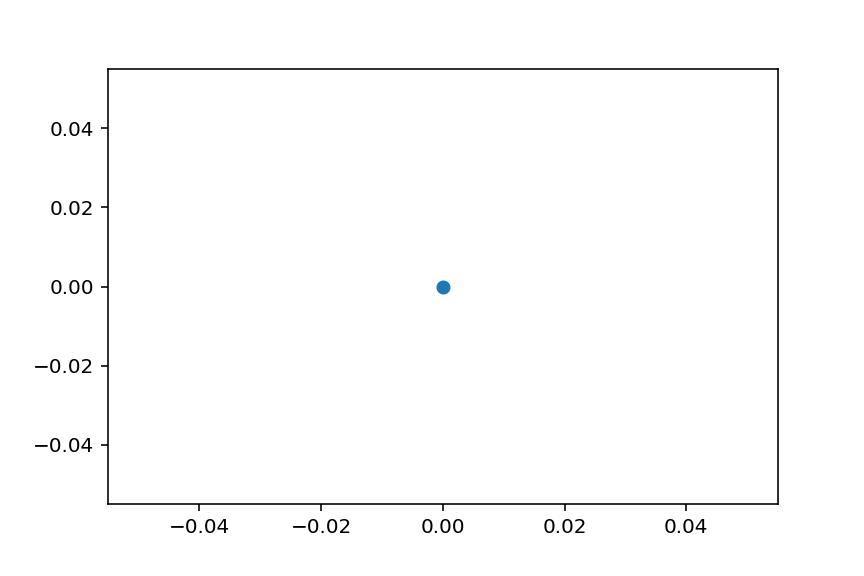

In [98]:
layout = pn.Column(pn.Row(button, str(bool(hidden_widget.value))), map_pane, plot_pane)
layout

test

In [53]:
button = pn.widgets.Button(name='Click me', button_type='primary')
text = pn.pane.Markdown(object='Ready')
def b(event):
    text.object = f'Clicked {button.clicks} times'
button.on_click(b)
pn.Row(button, text)


Row
    [0] Button(button_type='primary', name='Click me')
    [1] Markdown(str)

In [54]:
state = False
button = pn.widgets.Button(name='Click me', button_type='primary')
text = pn.pane.Markdown(object='Ready')
text1 = pn.pane.Markdown(object='Has not clicked')
def b(event):
    global state
    state = True
    text.object = some_func()
def some_func():
    return f'Clicked {button.clicks} times'
    
button.on_click(b)
pn.Row(button, text)


Row
    [0] Button(button_type='primary', name='Click me')
    [1] Markdown(str)

In [ ]:
button.

```python
STATE = False
def plot_function():
    if not state:
        return plot1()
    else:
        return plot2()
def callback(*args, **kwargs):
    global state
    if state:
        state = False
    else:
        state = True
    plot_pane.object = plot_function()
button.on_click(callback)
```

In [102]:
a = pn.widgets.RadioButtonGroup(options=['a','b'])
a

RadioButtonGroup(options=['a', 'b'], value='a')

In [103]:
a.value

'a'

vil se hva som skjer hvis jeg enderer objekt til ting som blir renderet i layout ..

In [148]:
text_widget = pn.widgets.TextInput(value='skriv her')
text_pane = pn.pane.Markdown(object='default tekst')
text_pane1 = pn.pane.Markdown(object='info om event')
#text_widget.link(text_pane, value='object')

In [149]:
def cb(*args):
    event = args[0]
    print(event)
    text_pane.object = text_widget.value.capitalize() + '!'
    text_pane1.object = str(event.__repr__())
text_widget.param.watch(cb, 'value')

Watcher(inst=TextInput(value='skriv her'), cls=<class 'panel.widgets.input.TextInput'>, fn=<function cb at 0x0000024DFDB9D5E8>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False)

In [150]:
pn.Row(text_widget, text_pane, text_pane1)

Row
    [0] TextInput(value='skriv her')
    [1] Markdown(str)
    [2] Markdown(str)

In [151]:
text_widget.value='hm'

Event(what='value', name='value', obj=TextInput(value='hm'), cls=TextInput(value='hm'), old='skriv her', new='hm', type='changed')


In [145]:
text_widget.value = 'hmm!'

In [136]:
text_pane.object

'default tekst'

In [134]:
text_widget.value = 'test'

In [127]:
text_widget

'test'

In [113]:
pn.Row(text_widget, text_pane)

Row
    [0] TextInput(value='skriv her')
    [1] Markdown(str)

In [114]:
text_widget.value = 'LOL'

In [121]:
a.__repr__

<method-wrapper '__repr__' of str object at 0x0000024DFE6C6D70>

In [115]:
a = 'abba'

In [117]:
a.capitalize() + '!'

'abba'